# Labelling with Newsguard

In [2]:
import os
import json

from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")
mbfc_path = os.path.join(pd1, "data/mbfc")
newsguard_path = os.path.join(pd1, "data/newsguard")

## Reading Newsguard

In [4]:
newsguard = json.load(open(os.path.join(newsguard_path, "newsguard.json")))

In [5]:
len(newsguard)

3887

In [6]:
ns_newsguard = list(newsguard.keys())

## Finding intersection between current news sources and newsguard data

In [7]:
ns_fixed = json.load(open("ns_fixed.json", "r"))

In [9]:
len(ns_fixed)

2643

In [10]:
"foxnews.com" in ns_fixed

True

In [11]:
intersection = set(ns_newsguard) & set(ns_fixed)
len(intersection)

784

In [12]:
newsguard["wtop.com"].keys()

dict_keys(['rating_score', 'ownership', 'financing', 'content', 'credibility', 'transparency', 'history', 'rated', '1)no false content', '2)responsible presentation', '3)corrects errors', '4)distinguishes news & opinion', '5)no deceptive headlines', '6)ownership disclosed', '7)labels advertising', '8)transparent leadership', '9)names content creators'])

In [13]:
rated = [(i,newsguard[i]["rating_score"])  for i in intersection if newsguard[i]["rating_score"] != "n/a"]
len(rated)

341

In [14]:
intersection - set([k[0] for k in rated])

{'10news.com',
 '10tv.com',
 '13abc.com',
 '13newsnow.com',
 '14news.com',
 '4029tv.com',
 '5newsonline.com',
 '972mag.com',
 '9news.com',
 '9news.com.au',
 'abc.net.au',
 'abc17news.com',
 'abc30.com',
 'abc3340.com',
 'abc57.com',
 'abc6onyourside.com',
 'acast.com',
 'actionnewsnow.com',
 'ad.nl',
 'adn.com',
 'afr.com',
 'africanews.com',
 'al-monitor.com',
 'alarabiya.net',
 'allafrica.com',
 'allure.com',
 'ama-assn.org',
 'americanbanker.com',
 'americansongwriter.com',
 'androidauthority.com',
 'androidcentral.com',
 'androidpolice.com',
 'aptnnews.ca',
 'arktimes.com',
 'arte.tv',
 'asiaone.com',
 'autocar.co.uk',
 'aviationweek.com',
 'azfamily.com',
 'azpbs.org',
 'bakersfield.com',
 'bangkokpost.com',
 'bigissue.com',
 'biologicaldiversity.org',
 'biorxiv.org',
 'bitcoinmagazine.com',
 'blabbermouth.net',
 'bloody-disgusting.com',
 'bonappetit.com',
 'bostonreview.net',
 'breakingnews.ie',
 'broadwayworld.com',
 'burnabynow.com',
 'business-standard.com',
 'bworldonline.com

In [15]:
rated = [(n, float(r.split("/")[0])) for n,r in rated]

In [16]:
reliable = [k for k in rated if k[1]>=60]
len(reliable)

328

In [17]:
unreliable = [k for k in rated if k[1]<60]
len(unreliable)

13

In [19]:
json.dump(unreliable, open("unreliable.json", "w"))

In [19]:
scores = [k[1] for k in rated]

<AxesSubplot:ylabel='Count'>

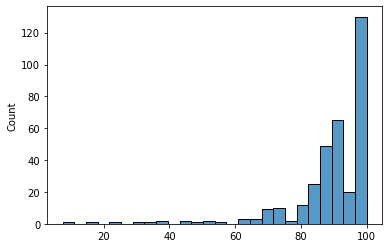

In [23]:
sns.histplot(scores)

## Seeing subreddits intersection for unreliable news sources

In [20]:
# Reading in all the subreddits in our files

with open(os.path.join(data_fp,"subreddit_ns_2021-01.json"), "r", encoding = "utf-8") as infile1a:
    subreddit_ns_jan = json.load(infile1a)

with open(os.path.join(data_fp,"subreddit_ns_2021-02.json"), "r", encoding = "utf-8") as infile2a:
    subreddit_ns_feb = json.load(infile2a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-03.json"), "r", encoding = "utf-8") as infile3a:
    subreddit_ns_march = json.load(infile3a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-04.json"), "r", encoding = "utf-8") as infile4a:
    subreddit_ns_april = json.load(infile4a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-05.json"), "r", encoding = "utf-8") as infile5a:
    subreddit_ns_may = json.load(infile5a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-06.json"), "r", encoding = "utf-8") as infile6a:
    subreddit_ns_jun = json.load(infile6a)

In [30]:
# ns_subreddit
with open(os.path.join(data_fp,"ns_subreddit_2021-01.json")) as infile1:
    ns_subreddit_01 = json.load(infile1)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-02.json")) as infile2:
    ns_subreddit_02 = json.load(infile2)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-03.json")) as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-04.json")) as infile4:
    ns_subreddit_04 = json.load(infile4)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-05.json")) as infile5:
    ns_subreddit_05 = json.load(infile5)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-06.json")) as infile6:
    ns_subreddit_06 = json.load(infile6)

In [47]:
ns_unreliable_sr = defaultdict(dict)
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

for n,_ in unreliable:
    for f in files_ns:
        # check if ns in current ns_subreddit file
        if n in f:
            for s in f[n]:
                ns_unreliable_sr[n][s] = ns_unreliable_sr[n].get(s,0) + f[n][s][0]
        else:
            print(n)

In [49]:
ns_unreliable_sr.keys()

dict_keys(['trtworld.com', 'redstate.com', 'gulfnews.com', 'sciencetimes.com', 'dailykos.com', 'newsmax.com', 'sputniknews.com', 'xinhuanet.com', 'aawsat.com', 'outkick.com', 'frontpagemag.com', 'lifesitenews.com', 'tmz.com'])

In [51]:
for k in ns_unreliable_sr:
    counter = Counter(ns_unreliable_sr[k])
    print("----- for {} ------".format(k))
    print(counter.most_common(10))
    print("\n")

----- for trtworld.com ------
[('Bruneians', 140), ('COVID_CANADA', 80), ('worldnews', 71), ('NoFilterNews', 25), ('news', 22), ('europe', 20), ('autotldr', 17), ('Turkey', 11), ('islam', 10), ('Coronavirus', 9)]


----- for redstate.com ------
[('Conservative', 1300), ('ConservativesOnly', 394), ('conservatives', 253), ('TheNewsFeed', 180), ('NEWPOLITIC', 151), ('Republican', 147), ('EXDemocrats2021', 115), ('KamalaHatesAmerica', 97), ('u_Death5talker451968', 94), ('SaltyArmy', 75)]


----- for gulfnews.com ------
[('Worldnews_Headline', 307), ('dubai', 105), ('worldnews', 39), ('Fujairah', 33), ('COVID_CANADA', 26), ('pakistan', 25), ('DubaiCentral', 21), ('india', 16), ('NoFilterNews', 16), ('Coronavirus', 13)]


----- for sciencetimes.com ------
[('space', 13), ('science', 10), ('Animals', 7), ('worldnews', 6), ('Health', 5), ('Coronavirus', 4), ('COVID_CANADA', 4), ('EverythingScience', 3), ('nottheonion', 2), ('SpaceXLounge', 2)]


----- for dailykos.com ------
[('politics', 109)

In [53]:
# count number of unique unreliable news sources in each subreddits
subreddits = defaultdict(int)

for k in ns_unreliable_sr:
    for s in ns_unreliable_sr[k]:
        subreddits[s] += 1

In [54]:
Counter(subreddits).most_common()

[('news', 13),
 ('worldnews', 12),
 ('conspiracy', 12),
 ('politics', 11),
 ('nottheonion', 11),
 ('AnythingGoesNews', 10),
 ('Coronavirus', 10),
 ('NoNewNormal', 10),
 ('technology', 9),
 ('Conservative', 9),
 ('todayilearned', 9),
 ('CryptoCurrency', 8),
 ('wallstreetbets', 8),
 ('Libertarian', 8),
 ('UpliftingNews', 8),
 ('WayOfTheBern', 8),
 ('civocracy', 7),
 ('NoFilterNews', 7),
 ('stupidpol', 7),
 ('MarsSociety', 7),
 ('conservatives', 7),
 ('LockdownSkepticism', 7),
 ('ScienceUncensored', 7),
 ('COVID_CANADA', 6),
 ('europe', 6),
 ('autotldr', 6),
 ('space', 6),
 ('thedavidpakmanshow', 6),
 ('SaltyArmy', 6),
 ('World_Politics', 6),
 ('whatsreallygoinon', 6),
 ('NEWPOLITIC', 6),
 ('Republican', 6),
 ('republicans', 6),
 ('LeopardsAteMyFace', 6),
 ('walkaway', 6),
 ('Anarcho_Capitalism', 6),
 ('AskThe_Donald', 6),
 ('worldpolitics', 6),
 ('CoronavirusCirclejerk', 6),
 ('u_Death5talker451968', 6),
 ('AmericanPolitics', 6),
 ('kotakuinaction2', 6),
 ('Health', 6),
 ('IntelligenceNe

Let's see if these subreddits are balanced in the sense of do they also have reliable news?

In [55]:
ns_reliable_sr = defaultdict(dict)
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

for n,_ in reliable:
    for f in files_ns:
        # check if ns in current ns_subreddit file
        if n in f:
            for s in f[n]:
                ns_reliable_sr[n][s] = ns_reliable_sr[n].get(s,0) + f[n][s][0]
        else:
            print(n)

In [58]:
len(ns_reliable_sr.keys())

328

In [60]:
for k in list(ns_reliable_sr.keys())[:20]:
    counter = Counter(ns_reliable_sr[k])
    print("----- for {} ------".format(k))
    print(counter.most_common(10))
    print("\n")

----- for lifehacker.com ------
[('FreshNewsToday', 27), ('NewsfeedForWork', 18), ('newsnerdsneed', 14), ('News_Food', 11), ('todayilearned', 11), ('CoronavirusRelief', 11), ('technolgynews', 8), ('CryptoCurrency', 7), ('News_Microsoft', 5), ('technology', 5)]


----- for cjr.org ------
[('Journalism', 15), ('politics', 12), ('media_criticism', 5), ('Conservative', 3), ('TrueReddit', 3), ('WayOfTheBern', 3), ('stupidpol', 3), ('NewsWhatever', 3), ('News_Criticism', 3), ('neoliberal', 3)]


----- for kut.org ------
[('Austin', 141), ('TexasPolitics', 8), ('texas', 8), ('politics', 8), ('Coronavirus', 5), ('prisons', 5), ('sanmarcos', 5), ('atheism', 5), ('LegalNews', 5), ('austincirclejerk', 4)]


----- for ottawa.ctvnews.ca ------
[('u_toronto_news', 470), ('COVID_CANADA', 330), ('ottawa', 270), ('ontario', 54), ('canada', 28), ('CanadaCoronavirus', 12), ('Gatineau', 10), ('onguardforthee', 9), ('CanadaPolitics', 7), ('LockdownSkepticismCAN', 6)]


----- for golem.de ------
[('de', 332

In [61]:
# count number of unique unreliable news sources in each subreddits
subreddits_rel = defaultdict(int)

for k in ns_reliable_sr:
    for s in ns_reliable_sr[k]:
        subreddits_rel[s] += 1

In [62]:
Counter(subreddits_rel).most_common(50)

[('news', 289),
 ('politics', 275),
 ('Coronavirus', 260),
 ('nottheonion', 255),
 ('worldnews', 227),
 ('conspiracy', 223),
 ('todayilearned', 218),
 ('Conservative', 204),
 ('prisons', 204),
 ('NoFilterNews', 203),
 ('NoNewNormal', 199),
 ('COVID_CANADA', 196),
 ('autotldr', 178),
 ('AnythingGoesNews', 172),
 ('wallstreetbets', 167),
 ('UpliftingNews', 166),
 ('LockdownSkepticism', 165),
 ('RuralNewsNetwork', 160),
 ('Bad_Cop_No_Donut', 160),
 ('neoliberal', 152),
 ('CapitolConsequences', 150),
 ('badgovnofreedom', 144),
 ('Libertarian', 142),
 ('WayOfTheBern', 141),
 ('technology', 138),
 ('environment', 137),
 ('offbeat', 132),
 ('stupidpol', 131),
 ('chicannabis', 127),
 ('europe', 127),
 ('FreshNewsToday', 125),
 ('electionReformNews', 125),
 ('tomorrowsworld', 124),
 ('inthenews', 124),
 ('NewsfeedForWork', 121),
 ('LeopardsAteMyFace', 118),
 ('CryptoCurrency', 115),
 ('TrueCrime', 115),
 ('uspolitics', 115),
 ('BernieSanders', 114),
 ('NewsWhatever', 112),
 ('ABoringDystopia', 

Comparing subreddits and subreddits_rel

In [63]:
len(subreddits)

2267

In [64]:
len(subreddits_rel)

28835

In [69]:
top50unreliable_sub = [k[0] for k in Counter(subreddits).most_common(50)]

In [70]:
top50reliable_sub = [k[0] for k in Counter(subreddits_rel).most_common(50)]

In [71]:
# unreliable only 
set(top50unreliable_sub) - set(top50reliable_sub)

{'ActualidadMundial',
 'AmericanPolitics',
 'Anarcho_Capitalism',
 'AskThe_Donald',
 'CoronavirusCirclejerk',
 'Destiny',
 'Health',
 'IntelligenceNews',
 'MarsSociety',
 'NEWPOLITIC',
 'Republican',
 'SaltyArmy',
 'ScienceUncensored',
 'World_Politics',
 'anime_titties',
 'civocracy',
 'conservatives',
 'kotakuinaction2',
 'republicans',
 'space',
 'thedavidpakmanshow',
 'u_Death5talker451968',
 'walkaway',
 'whatsreallygoinon',
 'worldpolitics'}

In [72]:
# reliable only 
set(top50reliable_sub) - set(top50unreliable_sub)

{'ABoringDystopia',
 'Bad_Cop_No_Donut',
 'BernieSanders',
 'CapitolConsequences',
 'CoronavirusUS',
 'FreshNewsToday',
 'LateStageCapitalism',
 'NewsWhatever',
 'News_Food',
 'NewsfeedForWork',
 'RepublicanValues',
 'RuralNewsNetwork',
 'TrueCrime',
 'atheism',
 'badgovnofreedom',
 'chicannabis',
 'conspiracywhatever',
 'democrats',
 'environment',
 'inthenews',
 'neoliberal',
 'offbeat',
 'prisons',
 'tomorrowsworld',
 'uspolitics'}